# Exact solution used in MES runs


We would like to MES the operation

$$
\partial_\rho^3 f
$$

Using cylindrical geometry.

In [1]:
%matplotlib notebook

from sympy import init_printing
from sympy import S
from sympy import sin, cos, tanh, exp, pi, sqrt

from boutdata.mms import x, y, z, t
from boutdata.mms import DDX

import os, sys
# If we add to sys.path, then it must be an absolute path
common_dir = os.path.abspath('./../../../')
# Sys path is a list of system paths
sys.path.append(common_dir)
from common.python.mesGenerator import get_metric, make_plot, BOUT_print

init_printing()

## Initialize

In [2]:
folder = '../properZ/'
metric = get_metric()

## Define the variables

In [3]:
# Initialization
the_vars = {}

### Define the function to take the derivative of

**NOTE**:

1. z must be periodic
2. The field $f(\rho, \theta)$ must be of class infinity in $z=0$ and $z=2\pi$
3. The field $f(\rho, \theta)$ must be single valued when $\rho\to0$
4. The field $f(\rho, \theta)$ must be continuous in the $\rho$ direction with $f(\rho, \theta + \pi)$
5. Eventual BC in $\rho$ must be satisfied

In [4]:
# We need Lx
from boututils.options import BOUTOptions
myOpts = BOUTOptions(folder)
Lx = eval(myOpts.geom['Lx'])

In [5]:
# The gaussian

# In cartesian coordinates we would like
# f = exp(-(1/(2*w^2))*((x-x0)^2 + (y-y0)^2))
# In cylindrical coordinates, this translates to
# f = exp(-(1/(2*w^2))*(x^2 + y^2 + x0^2 + y0^2 - 2*(x*x0+y*y0) ))
#   = exp(-(1/(2*w^2))*(rho^2 + rho0^2 - 2*rho*rho0*(cos(theta)*cos(theta0)+sin(theta)*sin(theta0)) ))
#   = exp(-(1/(2*w^2))*(rho^2 + rho0^2 - 2*rho*rho0*(cos(theta - theta0)) ))
w = 0.5*Lx
rho0 = 0.2*Lx
theta0 = pi
the_vars['f'] = exp(-(1/(2*w**2))*(x**2 + rho0**2 - 2*x*rho0*(cos(z - theta0)) ))

Calculating the solution

In [6]:
the_vars['S'] = DDX(DDX(DDX(the_vars['f'], metric=metric), metric=metric), metric=metric)

## Plot

<IPython.core.display.Javascript object>


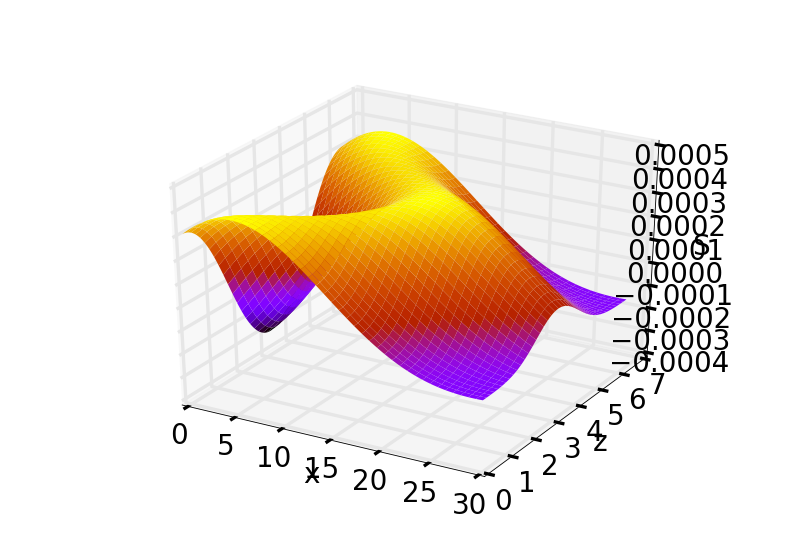

<IPython.core.display.Javascript object>


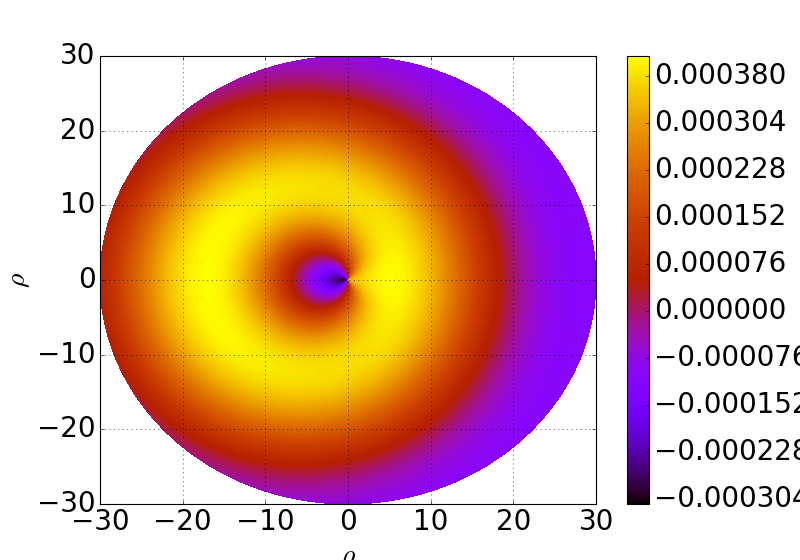

<IPython.core.display.Javascript object>


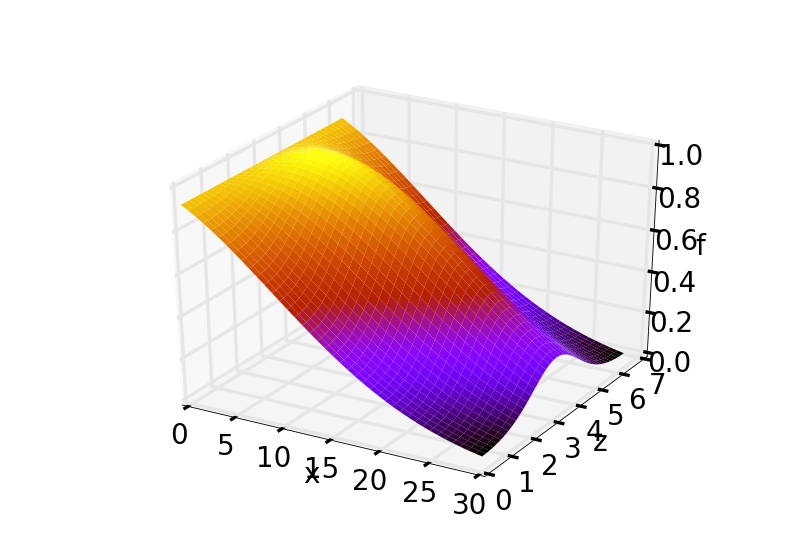

<IPython.core.display.Javascript object>


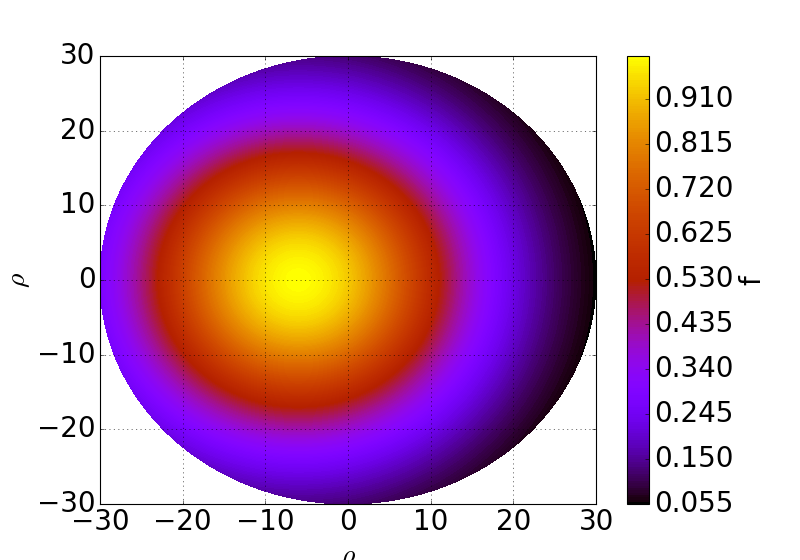

In [7]:
make_plot(folder=folder, the_vars=the_vars, plot2d=True, include_aux=False)

## Print the variables in BOUT++ format

In [8]:
BOUT_print(the_vars, rational=False)


[S]
0.923116346386636*(-0.00444444444444444*geom:xl - 0.0266666666666667*cos(z))^3*exp(-0.00222222222222222*geom:xl^2 - 0.0266666666666667*geom:xl*cos(z)) - 0.00410273931727394*(-0.00444444444444444*geom:xl - 0.0266666666666667*cos(z))*exp(-0.00222222222222222*geom:xl^2 - 0.0266666666666667*geom:xl*cos(z)) + 0.923116346386636*(3.95061728395062e-5*geom:xl + 0.000237037037037037*cos(z))*exp(-0.00222222222222222*geom:xl^2 - 0.0266666666666667*geom:xl*cos(z))

[f]
0.923116346386636*exp(-0.00222222222222222*geom:xl^2 - 0.0266666666666667*geom:xl*cos(z))
